In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import eigh

import exact
import level_statistics as level_stat

# Comparing spectra

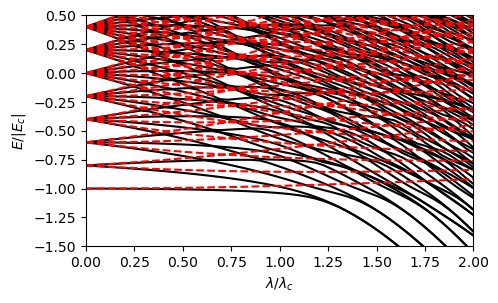

In [8]:
plt.rcParams['figure.figsize'] = (5, 3)

N = 10
N_photons_cutoff = 50

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lams = lamc * np.linspace(0, 2, 50)


energies = []
for lam in lams:
    H = exact.dicke(wz, wc, lam, N/2, N_photons_cutoff)
    vals = eigh(H, eigvals_only=True)
    
    energies.append(vals / (N/2))

plt.plot(lams / lamc, energies, c='k')

energies = []
for lam in lams:
    H = exact.dicke_P2(wz, wc, lam, N/2, N_photons_cutoff)
    vals = eigh(H, eigvals_only=True)
    
    energies.append(vals / (N/2))

plt.plot(lams / lamc, energies, c='r', ls='dashed')

plt.ylabel(r'$E/|E_c|$')
plt.xlabel(r'$\lambda/\lambda_c$')
plt.xlim(0, 2)
plt.ylim(-1.5, 0.5)
plt.show()

# Tests with the regular Dicke model

In [12]:
plt.rcParams['figure.figsize'] = (5, 3)

N = 40
N_photons_cutoff = 50

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lam = 0.8

P = level_stat.Peven(N/2, N_photons_cutoff)
H = exact.dicke(wz, wc, lam, N/2, N_photons_cutoff)
projected_H = P @ H @ P
trimed_H = level_stat.trim_hamiltonian(projected_H)
vals = eigh(trimed_H, eigvals_only=True)

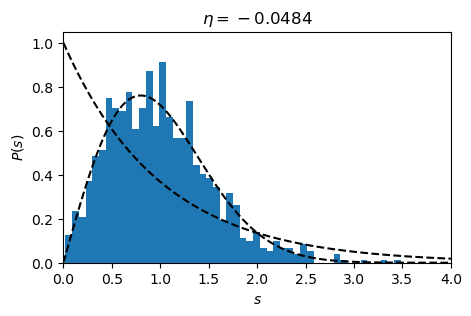

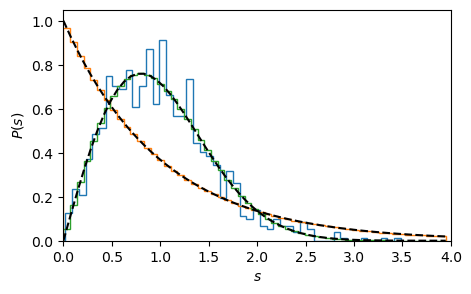

In [16]:
start = 0
end = -1
level_spacings = (vals[start+1:end] - vals[start:end-1])
renormalized_spacings = level_spacings / level_stat.moving_average(level_spacings, 50) # unfolding: i.e. adjust for underlying level_density


bins = 50
plt.hist(renormalized_spacings, bins=bins, density=True)
s = np.linspace(0, 4, 1000)
plt.plot(s, np.exp(-s), c='k', ls='dashed')
wigner = lambda s: 0.5*np.pi*s * np.exp(-0.25*np.pi*s**2)
plt.plot(s, wigner(s), c='k', ls='dashed')
plt.title(rf'$\eta = {round(level_stat.wigner_surmise_degree(renormalized_spacings, bins), 4)}$')
plt.ylabel(r'$P(s)$')
plt.xlabel(r'$s$')
plt.xlim(0, 4)
#plt.ylim(0, 2)
#plt.ylim(-1.5, -0.5)
plt.show()

counts, bin_edges = np.histogram(renormalized_spacings, bins=bins, density=True)
plt.stairs(counts, bin_edges)
ds = bin_edges[1] - bin_edges[0]
s = np.arange(0, 4, ds)
plt.plot(s, np.exp(-s), c='k', ls='dashed')
plt.stairs(np.exp(-(s[:-1] + ds/2)), s)

plt.plot(s, wigner(s), c='k', ls='dashed')
plt.stairs(wigner(s[:-1] + ds/2), s)
plt.ylabel(r'$P(s)$')
plt.xlabel(r'$s$')
plt.xlim(0, 4)
#plt.ylim(0, 2)
#plt.ylim(-1.5, -0.5)
plt.show()

# Tests with P2

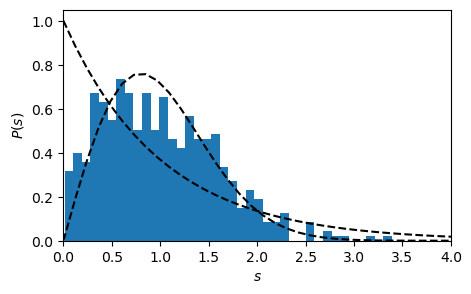

In [4]:
plt.rcParams['figure.figsize'] = (5, 3)

N = 20
N_photons_cutoff = 50

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lam = 0.8

P = level_stat.Peven(N/2, N_photons_cutoff)

# H = dicke(wz, wc, lam, N/2, N_photons_cutoff)
# #H = P @ H @ P
# vals = eigh(H, eigvals_only=True)
# plt.plot(vals / (N/2), marker='o', lw=0)

H = exact.dicke_P2(wz, wc, lam, N/2, N_photons_cutoff)
projected_H = P @ H @ P
trimed_H = level_stat.trim_hamiltonian(projected_H)
vals = eigh(trimed_H, eigvals_only=True)

start = 0
end = -1
level_spacings = (vals[start+1:end] - vals[start:end-1])
renormalized_spacings = level_spacings / level_stat.moving_average(level_spacings, 50) # unfolding: i.e. adjust for underlying level_density


plt.hist(renormalized_spacings, bins=50, density=True)
s = np.linspace(0, 12, 100)
plt.plot(s, np.exp(-s), c='k', ls='dashed')
plt.plot(s, 0.5*np.pi*s * np.exp(-0.25*np.pi*s**2), c='k', ls='dashed')
plt.ylabel(r'$P(s)$')
plt.xlabel(r'$s$')
plt.xlim(0, 4)
#plt.ylim(0, 2)
#plt.ylim(-1.5, -0.5)
plt.show()